In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

Connection with DB

In [2]:
import psycopg2

connect = psycopg2.connect(
    host = "localhost",
    user = "root",
    password = "root",
    database = "postgres",
    port = "5432"

)
connect.autocommit = True

SQL query to create the table

In [3]:
def makeQuery():
    cursor = connect.cursor()

    # SQL query to create the table
    query = """
    CREATE TABLE IF NOT EXISTS applicants (
        first_name VARCHAR(500),
        last_name VARCHAR(500),
        email VARCHAR(500),
        application_date VARCHAR(500),
        country VARCHAR(500),
        years_of_experience VARCHAR(500),
        seniority VARCHAR(500),
        technology VARCHAR(500),
        code_challenge_score VARCHAR(500),
        technical_interview_score VARCHAR(500)
    );
    """

    cursor.execute(query)
    cursor.close()

makeQuery()

# Insert the data from candidates.csv uploaded in the storage of Pgadmin.

query = """
COPY applicants (first_name, last_name, email, application_date, country, years_of_experience, seniority, technology, code_challenge_score, technical_interview_score) 
FROM 'D:\Workshop1david\data\pgadmin-data\storage\davidvelasquezlenis_gmail.com\candidates.csv' DELIMITER ';' CSV HEADER;
"""
makeQuery()

EDA

Make the pandas Dataframe

In [4]:
cursor = connect.cursor()
cursor.execute("SELECT * FROM applicants")
dbtable = cursor.fetchall()
df = pd.DataFrame(dbtable)

#1 Data Understanding:
Displays the first rows of data, displays information about the DataFrame, and displays statistical summary of the DataFrame

In [5]:
print(df.head())  # Looking at the top rows
print(df.info())  # info about Dataset
print(df.describe())  # A little describe of the Dataset
print(df.dtypes) # Datatypes
df.isna().sum() # Sum the null values to know the amount

            0          1                         2                 3        4  \
0  First Name  Last Name                     Email  Application Date  Country   
1  Bernadette  Langworth       leonard91@yahoo.com        2021-02-26   Norway   
2      Camryn   Reynolds       zelda56@hotmail.com        2021-09-09   Panama   
3       Larue     Spinka  okey_schultz41@gmail.com        2020-04-14  Belarus   
4        Arch     Spinka    elvera_kulas@yahoo.com        2020-10-01  Eritrea   

     5          6               7                     8  \
0  YOE  Seniority      Technology  Code Challenge Score   
1    2     Intern   Data Engineer                     3   
2   10     Intern   Data Engineer                     2   
3    4  Mid-Level  Client Success                    10   
4   25    Trainee       QA Manual                     7   

                           9  
0  Technical Interview Score  
1                          3  
2                         10  
3                          9  
4  

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

Graph the unique values ​​and count them in the entire DataFrame

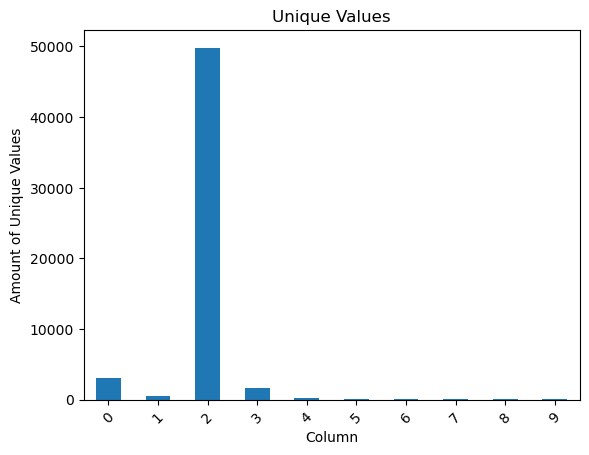

In [6]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].nunique()
    
# Convert the dictionary into a Series for easier visualization
unique_series = pd.Series(unique_values)
    
# Plot the unique values
unique_series.plot(kind='bar')
plt.title('Unique Values')
plt.xlabel('Column')
plt.ylabel('Amount of Unique Values')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

#2 Data preparation:
First of all, change the hearders to the original names, not numbers.

In [7]:
# Extract the second row as column headers
new_headers = df.iloc[0]

# Assign the new headers to the DataFrame
df.columns = new_headers

# Drop the second row
df = df.drop(df.index[0])

print(df.head())

0  First Name   Last Name                      Email Application Date  \
1  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
2      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
3       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
4        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
5       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

0  Country YOE  Seniority                         Technology  \
1   Norway   2     Intern                      Data Engineer   
2   Panama  10     Intern                      Data Engineer   
3  Belarus   4  Mid-Level                     Client Success   
4  Eritrea  25    Trainee                          QA Manual   
5  Myanmar  13  Mid-Level  Social Media Community Management   

0 Code Challenge Score Technical Interview Score  
1                    3                         3  
2                    2                        10  
3                   10 

In [8]:
# Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
# Reset index and add column id
df.reset_index(inplace=True)
df.rename(columns={'index': 'id'}, inplace=True)

I change the data type of some columns that are numeric and were as object 

In [10]:
df['yoe'] = df['yoe'].astype(int)
df['code_challenge_score'] = df['code_challenge_score'].astype(int)
df['technical_interview_score'] = df['technical_interview_score'].astype(int)
df['application_date'] = pd.to_datetime(df['application_date'])
print(df.dtypes)

0
id                                    int64
first_name                           object
last_name                            object
email                                object
application_date             datetime64[ns]
country                              object
yoe                                   int32
seniority                            object
technology                           object
code_challenge_score                  int32
technical_interview_score             int32
dtype: object


With this now I can look for outliners, using the int values.

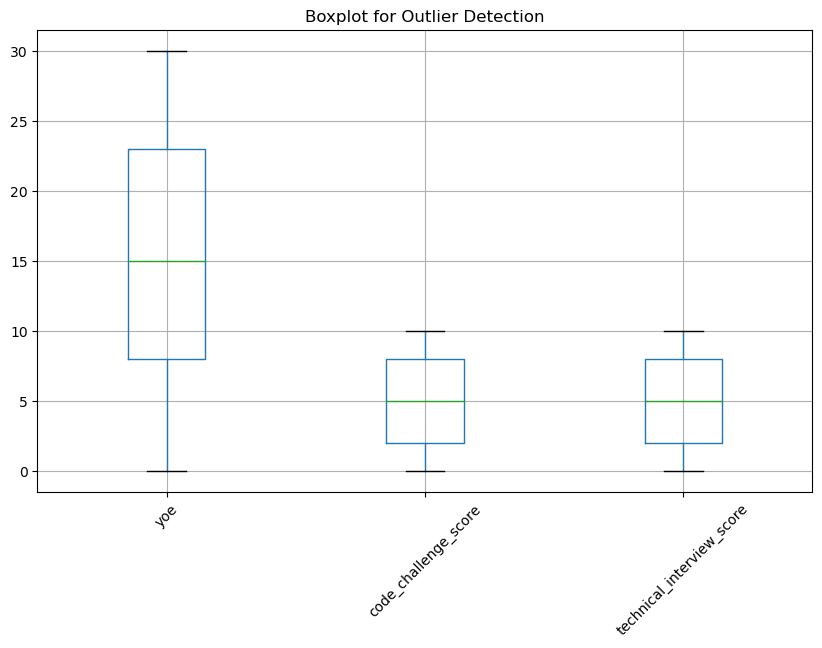

In [11]:
# Specify the numerical columns
numerical_columns = ['yoe', 'code_challenge_score', 'technical_interview_score']

# Create boxplots for each numerical column to visualize potential outliers
plt.figure(figsize=(10,6))
df[numerical_columns].boxplot()
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

I divide the Application Date column into three other new columns: Year, month and day.

In [12]:
df['year'] = df['application_date'].dt.year
df['month'] = df['application_date'].dt.month
df['day'] = df['application_date'].dt.day
print(df['year'], df['month'], df['day'])

0        2021
1        2021
2        2020
3        2020
4        2020
         ... 
49995    2022
49996    2020
49997    2018
49998    2020
49999    2022
Name: year, Length: 50000, dtype: int64 0         2
1         9
2         4
3        10
4         5
         ..
49995     1
49996     6
49997    12
49998     5
49999     6
Name: month, Length: 50000, dtype: int64 0        26
1         9
2        14
3         1
4        20
         ..
49995     9
49996     2
49997    15
49998    30
49999    13
Name: day, Length: 50000, dtype: int64


This calculates the lengths of strings in specified columns. It then finds the maximum and minimum lengths for each column and prints them out. I made it to find extreme large names o data that can be incorrect.

In [14]:
# Selecten columns
character_columns = ['first_name', 'last_name', 'email', 'country', 'seniority', 'technology']

# Calculate the length of each string in the specified columns
longitudes = {}
for column in character_columns:
    longitudes[column] = df[column].str.len()

# Find the maximum and minimum lengths
max_lengths = {column: lengths.max() for column, lengths in longitudes.items()}
min_lengths = {column: lengths.min() for column, lengths in longitudes.items()}

print("Maximum lengths:")
for column, max_length in max_lengths.items():
    print(f"{column}: {max_length}")

print("\nMinimum lengths:")
for column, min_length in min_lengths.items():
    print(f"{column}: {min_length}")

Maximum lengths:
first_name: 11
last_name: 13
email: 36
country: 51
seniority: 9
technology: 39

Minimum lengths:
first_name: 2
last_name: 3
email: 13
country: 4
seniority: 4
technology: 5


In [15]:
df.describe()

,id,yoe,code_challenge_score,technical_interview_score,year,month,day
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,15.286980,4.996400,5.003880,2019.784080,6.206760,15.695560
std,14433.901067,8.830652,3.166896,3.165082,1.315619,3.421895,8.818779
min,1.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000
25%,12500.750000,8.000000,2.000000,2.000000,2019.000000,3.000000,8.000000
50%,25000.500000,15.000000,5.000000,5.000000,2020.000000,6.000000,16.000000
75%,37500.250000,23.000000,8.000000,8.000000,2021.000000,9.000000,23.000000
max,50000.000000,30.000000,10.000000,10.000000,2022.000000,12.000000,31.000000


#3 Data visualization. 